# Classification

In [38]:
! pip install pydotplus
! pip install graphviz
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus, graphviz



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


# 1. Visegrad Group Companies Dataset

We use Visegrad Group Companies dataset for our clustering.
We first import the dataset as follows.

https://archive.ics.uci.edu/dataset/830/visegrad+group+companies+data-2


X1: Net profit/total assets <br/>
X2: Total liabilities/total assets <br/>
X3: Working capital/total assets <br/>
X4: Current assets/short-term liabilities <br/>
X5: Retained earnings/total assets <br/>
X6: Gross profit/total assets <br/>
X7: Book value of equity/total liabilities <br/>
X8: Net sales revenue/total assets <br/>
X9: Equity/total assets <br/>
X10: (Gross profit + financial expenses)/total assets <br/>
X11: Gross profit/short-term liabilities <br/>
X12: (Gross profit + depreciation)/sales revenues <br/>
X13: EBIT/total operating costs <br/>
X14: (Gross profit + depreciation)/total liabilities <br/>
X15: Total assets/total liabilities <br/>
X16: EBIT/total liabilities <br/>
X17: Gross profit/sales revenues <br/>
X18: EBIT/total assets <br/>
X19: Net profit/sales revenues <br/>
X20: (Equity-share capital)/total assets <br/>
X21: (Net profit + depreciation)/total liabilities <br/>
X22: EBIT/financial expenses <br/>
X23: Working capital/fixed assets <br/>
X24: Logarithm of total assets <br/>
X25: (Total liabilities-cash)/sales revenues <br/>
X26: EBIT/equity <br/>
X27: Operating expenses/short-term liabilities <br/>
X28: Operating expenses/total liabilities <br/>
X29: Profit on sales/total assets <br/>
X30: Total operating revenue/total assets <br/>
X31: (Current assets-inventories)/long-term liabilities <br/>
X32: Constant capital/total assets <br/>
X33: Profit on sales/sales revenues <br/>
X34: (Current assets-inventory-receivables)/short-term liabilities <br/>
X35: EBIT/sales revenues <br/>
X36: Net profit/inventory <br/>
X37: (Current assets-inventory)/short-term liabilities <br/>
X38: EBITDA/total assets <br/>
X39: EBITDA/sales revenues <br/>
X40: Current assets/total liabilities <br/>
X41: Short-term liabilities/total assets <br/>
X42: Equity/fixed assets <br/>
X43: Constant capital/fixed assets <br/>
X44: Working capital <br/>
X45: Net profit/equity <br/>
X46: Long-term liabilities/equity <br/>
X47: Sales revenues/inventory <br/>
X48: Sales revenues/receivables <br/>
X49: Sales revenues/short-term liabilities <br/>
X50: Sales/fixed assets <br/>
X51: (Current assets-inventory-short-term liabilities)/(total operating revenues-profit before income tax-depreciation) <br/>
X52: Net profit/net cash flow from (used in) operating activities <br/>
X53: Depreciation/net cash flow from (used in) operating activities <br/>
X54: Net cash flow from (used in) operating activities/total assets <br/>
X55: Net cash flow from (used in) operating activities/income <br/>
X56: Net cash flow from (used in) operating activities/total liabilities <br/>
X57: Net cash flow from (used in) operating activities/long-term liabilities <br/>
X58: Net cash flow from (used in) operating activities/short-term liabilities <br/>
X59: Net cash flow <br/>
X60: Net cash flow from (used in) operating activities/current assets <br/>
X61: Net cash flow from (used in) operating activities/EBIT <br/>
X62: Net profit per share <br/>
X63: Income/outstanding shares <br/>
X64: Price per share/net profit per share <br/>
X65: Yearly dividend/price per share <br/>
X66: Market capitalization/book value <br/>
X67: Market capitalization/gross profit <br/>
X68: Market capitalization/EBITDA <br/>
X69: Market capitalization to EBIT <br/>
X70: Market capitalization to total assets <br/>
X71: Market capitalization/capital employed <br/>
X72: Sales revenues (n)/sales revenues (n−1) <br/>
X73: Total sales revenue (n)/total sales revenues (n−1) <br/>
X74: Total assets (n)/total assets (n−1) <br/>
X75: Current assets (n)/current assets (n−1) <br/>
X76: EBIT (n)/EBIT (n−1) <br/>
X77: Net profit (n)/net profit (n−1) <br/>
X78: Inventory (n)/inventory (n−1) <br/>
X79: Receivables (n)/receivables (n−1) <br/>
X80: Short-term liabilities (n)/short-term liabilities (n−1) <br/>
X81: Net cash flow from (used in) operating activities (n)/Net cash flow from (used in) operating activities (n−1) <br/>
X82: Net cash flow(n)/net cash flow (n−1) <br/>

<br/>
Class Labels <br/>
(S): 1. Transportation and warehousing; 2. Wholesale trade; <br/>
3. Manufacturing; 4. Retail trade; 5. Energy; 6. Construction.


### Import dataset

In [39]:
#importing dataset
data = pd.read_csv('csv_result-2019.csv', header="infer")

df = data.copy()

# Display the DataFrame
df




,id,Num,Country,X1,X2,X3,X4,X5,X6,X7,...,X74,X75,X76,X77,X78,X79,X80,X81,X82,S
0,1,10,Hungary,m,m,m,m,m,m,m,...,0,0,0,m,0,0,0,m,m,1
1,2,22,Poland,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,27,Hungary,-0.04,0.83,-0.08,0.83,0,-0.03,0.21,...,0.82,0.92,1.16,110.93,0.85,0.96,0.91,m,m,1
3,4,73,Poland,0.01,0.73,0.04,1.06,0.1,0.01,0.37,...,0.87,0.82,-0.1,1.09,0.62,0.97,0.78,-1.03,1.34,1
4,5,74,Poland,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,404,Slovakia,0.05,0.09,0.03,1.52,0,0.06,10.47,...,0.94,0.88,0.85,m,m,1.04,0.79,m,m,6
446,447,423,Poland,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
447,448,427,Slovakia,-0.04,0.06,0.02,1.79,-0.78,-0.05,15.85,...,0.92,0.38,-2.07,m,m,0.63,0.56,m,m,6
448,449,432,Poland,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


# 2. Data Preprocessing

In [40]:
# dataset info
print('Number of instances = %d' % df.shape[0])
print('Number of attributes = %d' % df.shape[1])
df.head()
print(df.dtypes)

Number of instances = 450
Number of attributes = 86
id          int64
Num         int64
Country    object
X1         object
X2         object
            ...  
X79        object
X80        object
X81        object
X82        object
S           int64
Length: 86, dtype: object


In [41]:
# Loop through the columns X1 to X85 and convert to float
for col in [f'X{i}' for i in range(1, 83)]:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts to float, setting non-numeric to NaN

# drop categorical irrevevant data
df= df.drop(['S', 'Country', 'Num'], axis=1)



### Discretization of Target Feature (X19:Net profit/sales revenues)
Make Categories based on IQR </br>
'Low/Negative Profits': <= 25th percentile </br>
'Average Profits': <= 75th percentile && >25th percentile </br>
'Outperforming Profits': >75th percentile </br>

In [42]:
print(df['X19'].describe())
print(df['X19'].min())
print(df['X19'].max())

count     417.000000
mean       -5.479592
std       102.612414
min     -2092.350000
25%         0.000000
50%         0.020000
75%         0.060000
max         7.890000
Name: X19, dtype: float64
-2092.35
7.89


In [43]:
# Define thresholds based on the summary
low_threshold = 0.00  # 25th percentile
high_threshold = 0.06  # 75th percentile

# Categorize data
def categorize_profits(profit):
    if profit <= low_threshold:
        return 'Low/Negative Profits'
    elif low_threshold < profit <= high_threshold:
        return 'Average Profits'
    else:
        return 'Outperforming Profits'

df['Profit_Category'] = df['X1'].apply(categorize_profits)

# View categorized data
print(df)

      id    X1    X2    X3     X4    X5    X6     X7    X8    X9  ...   X74  \
0      1   NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN  ...  0.00   
1      2  0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  ...  0.00   
2      3 -0.04  0.83 -0.08   0.83  0.00 -0.03   0.21  1.14  0.17  ...  0.82   
3      4  0.01  0.73  0.04   1.06  0.10  0.01   0.37  1.78  0.27  ...  0.87   
4      5  0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  ...  0.00   
..   ...   ...   ...   ...    ...   ...   ...    ...   ...   ...  ...   ...   
445  446  0.05  0.09  0.03   1.52  0.00  0.06  10.47  0.21  0.91  ...  0.94   
446  447  0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  ...  0.00   
447  448 -0.04  0.06  0.02   1.79 -0.78 -0.05  15.85  0.08  0.94  ...  0.92   
448  449  0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  ...  0.00   
449  450 -0.10  0.10  0.61  11.41  0.27 -0.10   9.05  0.00  0.90  ...  0.93   

      X75   X76     X77   X78   X79   X80   X81   X

In [44]:
print(df['Profit_Category'].value_counts())

Profit_Category
Low/Negative Profits     176
Average Profits          170
Outperforming Profits    104
Name: count, dtype: int64


### Domain Level Aggregation

since I'm using X19 in the categorial form of Profit_Category to determine profitability, I should avoid attributes that use that are related to net profits

In [45]:
df= df.drop(['X1', 'X21', 'X36', 'X45', 'X52', 'X62', 'X77'], axis=1)

### Missing Values


In [46]:
print('Number of instances = %d' % df.shape[0])
print('Number of attributes = %d' % df.shape[1])

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col, df[col].isna().sum()))

Number of instances = 450
Number of attributes = 77
Number of missing values:
	id: 0
	X2: 18
	X3: 19
	X4: 21
	X5: 18
	X6: 18
	X7: 20
	X8: 18
	X9: 18
	X10: 18
	X11: 20
	X12: 38
	X13: 19
	X14: 25
	X15: 20
	X16: 20
	X17: 33
	X18: 18
	X19: 33
	X20: 18
	X22: 33
	X23: 25
	X24: 18
	X25: 33
	X26: 18
	X27: 20
	X28: 20
	X29: 18
	X30: 18
	X31: 51
	X32: 18
	X33: 33
	X34: 21
	X35: 33
	X37: 21
	X38: 26
	X39: 41
	X40: 21
	X41: 18
	X42: 24
	X43: 24
	X44: 1
	X46: 18
	X47: 55
	X48: 20
	X49: 20
	X50: 24
	X51: 23
	X53: 68
	X54: 23
	X55: 38
	X56: 25
	X57: 55
	X58: 25
	X59: 67
	X60: 24
	X61: 34
	X63: 23
	X64: 23
	X65: 36
	X66: 23
	X67: 25
	X68: 66
	X69: 33
	X70: 23
	X71: 29
	X72: 45
	X73: 35
	X74: 35
	X75: 38
	X76: 48
	X78: 74
	X79: 39
	X80: 36
	X81: 84
	X82: 84
	Profit_Category: 0


In [47]:
print(df.head)

<bound method NDFrame.head of       id    X2    X3     X4    X5    X6     X7    X8    X9   X10  ...   X73  \
0      1   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   NaN  ...  0.00   
1      2  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  0.00  ...  0.00   
2      3  0.83 -0.08   0.83  0.00 -0.03   0.21  1.14  0.17 -0.03  ...  0.92   
3      4  0.73  0.04   1.06  0.10  0.01   0.37  1.78  0.27  0.02  ...  1.02   
4      5  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  0.00  ...  0.00   
..   ...   ...   ...    ...   ...   ...    ...   ...   ...   ...  ...   ...   
445  446  0.09  0.03   1.52  0.00  0.06  10.47  0.21  0.91  0.06  ...  0.97   
446  447  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  0.00  ...  0.00   
447  448  0.06  0.02   1.79 -0.78 -0.05  15.85  0.08  0.94 -0.05  ...  0.53   
448  449  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  0.00  ...  0.00   
449  450  0.10  0.61  11.41  0.27 -0.10   9.05  0.00  0.90 -0.10  ...  0.95   

      X74   X75   X76

In [48]:
df_cleaned = df.dropna()

In [49]:
print('Number of instances = %d' % df_cleaned.shape[0])
print('Number of attributes = %d' % df_cleaned.shape[1])

print('Number of missing values:')
for col in df_cleaned.columns:
    print('\t%s: %d' % (col, df_cleaned[col].isna().sum()))

Number of instances = 238
Number of attributes = 77
Number of missing values:
	id: 0
	X2: 0
	X3: 0
	X4: 0
	X5: 0
	X6: 0
	X7: 0
	X8: 0
	X9: 0
	X10: 0
	X11: 0
	X12: 0
	X13: 0
	X14: 0
	X15: 0
	X16: 0
	X17: 0
	X18: 0
	X19: 0
	X20: 0
	X22: 0
	X23: 0
	X24: 0
	X25: 0
	X26: 0
	X27: 0
	X28: 0
	X29: 0
	X30: 0
	X31: 0
	X32: 0
	X33: 0
	X34: 0
	X35: 0
	X37: 0
	X38: 0
	X39: 0
	X40: 0
	X41: 0
	X42: 0
	X43: 0
	X44: 0
	X46: 0
	X47: 0
	X48: 0
	X49: 0
	X50: 0
	X51: 0
	X53: 0
	X54: 0
	X55: 0
	X56: 0
	X57: 0
	X58: 0
	X59: 0
	X60: 0
	X61: 0
	X63: 0
	X64: 0
	X65: 0
	X66: 0
	X67: 0
	X68: 0
	X69: 0
	X70: 0
	X71: 0
	X72: 0
	X73: 0
	X74: 0
	X75: 0
	X76: 0
	X78: 0
	X79: 0
	X80: 0
	X81: 0
	X82: 0
	Profit_Category: 0


In [50]:
print(df_cleaned.head)

<bound method NDFrame.head of       id    X2    X3    X4    X5    X6    X7    X8    X9   X10  ...    X73  \
1      2  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   0.00   
3      4  0.73  0.04  1.06  0.10  0.01  0.37  1.78  0.27  0.02  ...   1.02   
4      5  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   0.00   
5      6  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   0.00   
8      9  0.62  0.01  1.02 -0.01  0.01  0.61  1.66  0.38  0.02  ...   1.06   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
440  441  0.38  0.50  2.34 -0.06 -0.02  1.64  0.18  0.62 -0.02  ...   0.79   
441  442  1.65 -0.51  0.28 -1.40 -0.50 -0.39  1.16 -0.65 -0.43  ...  28.03   
442  443  0.83 -0.42  0.39 -0.29 -0.29  0.20  0.55  0.17 -0.28  ...   1.41   
446  447  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   0.00   
448  449  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   0.00   

      X74   X75    X76   X78   X7

In [51]:
print(df_cleaned['Profit_Category'].value_counts())

Profit_Category
Average Profits          107
Low/Negative Profits      81
Outperforming Profits     50
Name: count, dtype: int64


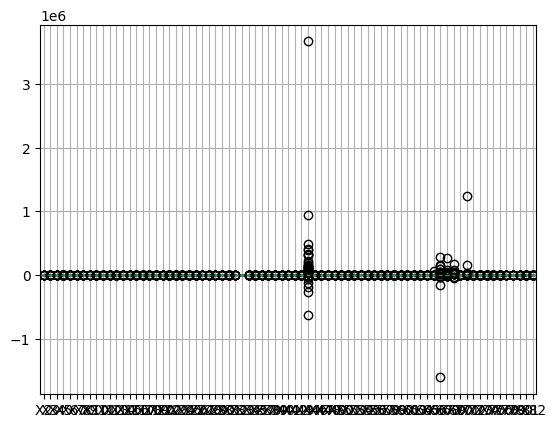

In [52]:
#drop id and target attribute
data2 = df_cleaned.drop(['id', "Profit_Category"], axis=1)
data2

#show boxplot to detect outliers
data2.boxplot()
plt.show()

this shows that some attributes has abnomally high and low values </br>
However the majority are nearer the 0 line

In [53]:
z = (data2-data2.mean())/data2.std()
z

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X72,X73,X74,X75,X76,X78,X79,X80,X81,X82
1,-1.411537,-0.275898,-1.265819,0.142108,-0.151795,-0.697126,-0.750801,-1.014621,-0.170706,-0.381634,...,-0.451337,-0.508915,-2.057132,-1.888035,-0.091534,-1.477692,-0.151088,-1.506892,-0.165211,-0.082386
3,0.577759,-0.150765,-0.312904,0.316266,-0.124026,-0.438287,0.319671,-0.240739,-0.115617,-0.344832,...,0.034019,-0.010431,-0.062051,-0.120713,-0.100286,-0.458537,-0.056891,-0.283346,-0.330059,-0.051111
4,-1.411537,-0.275898,-1.265819,0.142108,-0.151795,-0.697126,-0.750801,-1.014621,-0.170706,-0.381634,...,-0.451337,-0.508915,-2.057132,-1.888035,-0.091534,-1.477692,-0.151088,-1.506892,-0.165211,-0.082386
5,-1.411537,-0.275898,-1.265819,0.142108,-0.151795,-0.697126,-0.750801,-1.014621,-0.170706,-0.381634,...,-0.451337,-0.508915,-2.057132,-1.888035,-0.091534,-1.477692,-0.151088,-1.506892,-0.165211,-0.082386
8,0.278002,-0.244615,-0.348863,0.124692,-0.124026,-0.270391,0.247504,0.074546,-0.115617,-0.344832,...,-0.004638,0.009117,0.580044,0.547421,-0.062654,0.034603,-0.053007,0.595098,0.113270,-0.041542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,-0.376013,1.288268,0.837785,0.037612,-0.207333,0.450162,-0.642551,0.762441,-0.225795,-0.492042,...,-0.185036,-0.122835,0.029677,0.267235,-0.164172,0.346924,-0.087966,-0.157854,-0.314054,-0.044810
441,3.084817,-1.871347,-1.014105,-2.296115,-1.540239,-0.969957,-0.053190,-2.877671,-1.355118,-1.688129,...,14.178058,13.189618,-1.139854,-1.370770,3.850145,-1.477692,-0.065631,-0.816686,-0.147606,-0.096156
442,0.850265,-1.589798,-0.915218,-0.362953,-0.957092,-0.557213,-0.420037,-0.527362,-0.941951,-1.154491,...,-0.103427,0.180166,0.924023,-0.659531,-0.359330,-0.179091,-0.112244,3.936321,-0.715771,-0.072117
446,-1.411537,-0.275898,-1.265819,0.142108,-0.151795,-0.697126,-0.750801,-1.014621,-0.170706,-0.381634,...,-0.451337,-0.508915,-2.057132,-1.888035,-0.091534,-1.477692,-0.151088,-1.506892,-0.165211,-0.082386


In [54]:
# Assuming df_cleaned is your DataFrame
for i in range(1, 83):  # Looping from X1 to X85
    column_name = f"X{i}"
    z_column_name = f"z_score_{column_name}"
    
    if column_name in data2.columns:  # Check if the column exists
        # Compute z-score and create a new column
        df_cleaned[z_column_name] = (data2[column_name] - data2[column_name].mean()) / data2[column_name].std()
    else:
        print(f"Column {column_name} not found in the DataFrame.")

# Check the resulting DataFrame
print(df_cleaned.head())

Column X1 not found in the DataFrame.
Column X21 not found in the DataFrame.
Column X36 not found in the DataFrame.
Column X45 not found in the DataFrame.
Column X52 not found in the DataFrame.
Column X62 not found in the DataFrame.
Column X77 not found in the DataFrame.
   id    X2    X3    X4    X5    X6    X7    X8    X9   X10  ...  z_score_X72  \
1   2  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...    -0.451337   
3   4  0.73  0.04  1.06  0.10  0.01  0.37  1.78  0.27  0.02  ...     0.034019   
4   5  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...    -0.451337   
5   6  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...    -0.451337   
8   9  0.62  0.01  1.02 -0.01  0.01  0.61  1.66  0.38  0.02  ...    -0.004638   

   z_score_X73  z_score_X74  z_score_X75  z_score_X76  z_score_X78  \
1    -0.508915    -2.057132    -1.888035    -0.091534    -1.477692   
3    -0.010431    -0.062051    -0.120713    -0.100286    -0.458537   
4    -0.508915    -2.057132    

/tmp/ipykernel_15421/3222113322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[z_column_name] = (data2[column_name] - data2[column_name].mean()) / data2[column_name].std()
/tmp/ipykernel_15421/3222113322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[z_column_name] = (data2[column_name] - data2[column_name].mean()) / data2[column_name].std()
/tmp/ipykernel_15421/3222113322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [55]:
# Step 2: Filter rows where z-scores are between -3 and 3
for i in range(1, 83):  # Loop through X1 to X85 again for filtering
    z_column_name = f"z_score_X{i}"  # Construct z-score column name
    
    if z_column_name in df_cleaned.columns:  # Ensure the z-score column exists
        # Filter rows where the z-score is between -3 and 3
        df_cleaned = df_cleaned[df_cleaned[z_column_name].between(-3, 3)]
    else:
        print(f"Column {z_column_name} not found in the DataFrame.")

# Check the resulting DataFrame
print(df_cleaned)

Column z_score_X1 not found in the DataFrame.
Column z_score_X21 not found in the DataFrame.
Column z_score_X36 not found in the DataFrame.
Column z_score_X45 not found in the DataFrame.
Column z_score_X52 not found in the DataFrame.
Column z_score_X62 not found in the DataFrame.
Column z_score_X77 not found in the DataFrame.
      id    X2    X3    X4    X5    X6    X7    X8    X9   X10  ...  \
1      2  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   
4      5  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   
5      6  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   
8      9  0.62  0.01  1.02 -0.01  0.01  0.61  1.66  0.38  0.02  ...   
21    22  0.61  0.04  1.17  0.25  0.07  0.64  0.70  0.39  0.05  ...   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
438  439  0.43 -0.11  0.72 -0.29 -0.29  1.24  1.17  0.54 -0.26  ...   
439  440  1.18 -0.67  0.43 -0.66  0.06 -0.15  0.47 -0.18  0.14  ...   
440  441  0.38  0.50  2.34 -0.06 

In [56]:
# Loop through and drop z-score columns (z_score_X1 to z_score_X85)
for i in range(1, 83):  # Loop through X1 to X85
    z_column_name = f"z_score_X{i}"  # Construct z-score column name
    
    if z_column_name in df_cleaned.columns:  # Check if the column exists
        df_cleaned = df_cleaned.drop(columns=[z_column_name])  # Drop the column
    else:
        print(f"Column {z_column_name} not found in the DataFrame.")

# Check the resulting DataFrame
print(df_cleaned)

Column z_score_X1 not found in the DataFrame.
Column z_score_X21 not found in the DataFrame.
Column z_score_X36 not found in the DataFrame.
Column z_score_X45 not found in the DataFrame.
Column z_score_X52 not found in the DataFrame.
Column z_score_X62 not found in the DataFrame.
Column z_score_X77 not found in the DataFrame.
      id    X2    X3    X4    X5    X6    X7    X8    X9   X10  ...   X73  \
1      2  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
4      5  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
5      6  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
8      9  0.62  0.01  1.02 -0.01  0.01  0.61  1.66  0.38  0.02  ...  1.06   
21    22  0.61  0.04  1.17  0.25  0.07  0.64  0.70  0.39  0.05  ...  0.94   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
438  439  0.43 -0.11  0.72 -0.29 -0.29  1.24  1.17  0.54 -0.26  ...  0.80   
439  440  1.18 -0.67  0.43 -0.66  0.06 -0.15  0.47 -0.18

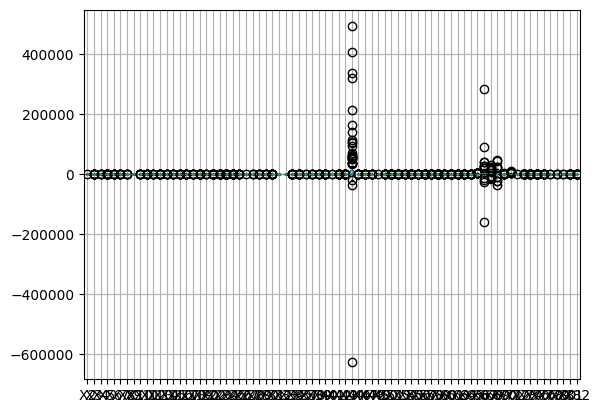

In [57]:
#drop id and Num
data2 = df_cleaned.drop(['id', 'Profit_Category'], axis=1)
data2

#show boxplot to detect outliers
data2.boxplot()
plt.show()

Attributes with outliers:
X59: 44 outliers
X5: 35 outliers
X73: 35 outliers
X24: 33 outliers
X74: 32 outliers
X75: 31 outliers
X44: 28 outliers
X82: 27 outliers
X22: 25 outliers
X61: 23 outliers
X57: 22 outliers
X81: 22 outliers
X23: 21 outliers
X51: 20 outliers
X43: 18 outliers
X64: 18 outliers
X55: 17 outliers
X53: 16 outliers
X25: 15 outliers
X63: 15 outliers
X34: 14 outliers
X67: 14 outliers
X19: 13 outliers
X31: 13 outliers
X35: 13 outliers
X76: 13 outliers
X13: 12 outliers
X42: 12 outliers
X47: 11 outliers
X58: 11 outliers
X65: 11 outliers
X3: 10 outliers
X17: 10 outliers
X50: 10 outliers
X54: 10 outliers
X66: 10 outliers
X68: 10 outliers
X11: 9 outliers
X60: 9 outliers
X69: 9 outliers
X70: 9 outliers
X26: 8 outliers
X40: 8 outliers
X46: 8 outliers
X56: 8 outliers
X71: 8 outliers
X6: 7 outliers
X7: 7 outliers
X16: 7 outliers
X48: 7 outliers
X10: 6 outliers
X15: 6 outliers
X18: 6 outliers
X8: 5 outliers
X12: 5 outliers
X14: 5 outliers
X29: 5 outliers
X30: 5 outliers
X39: 5 outlier

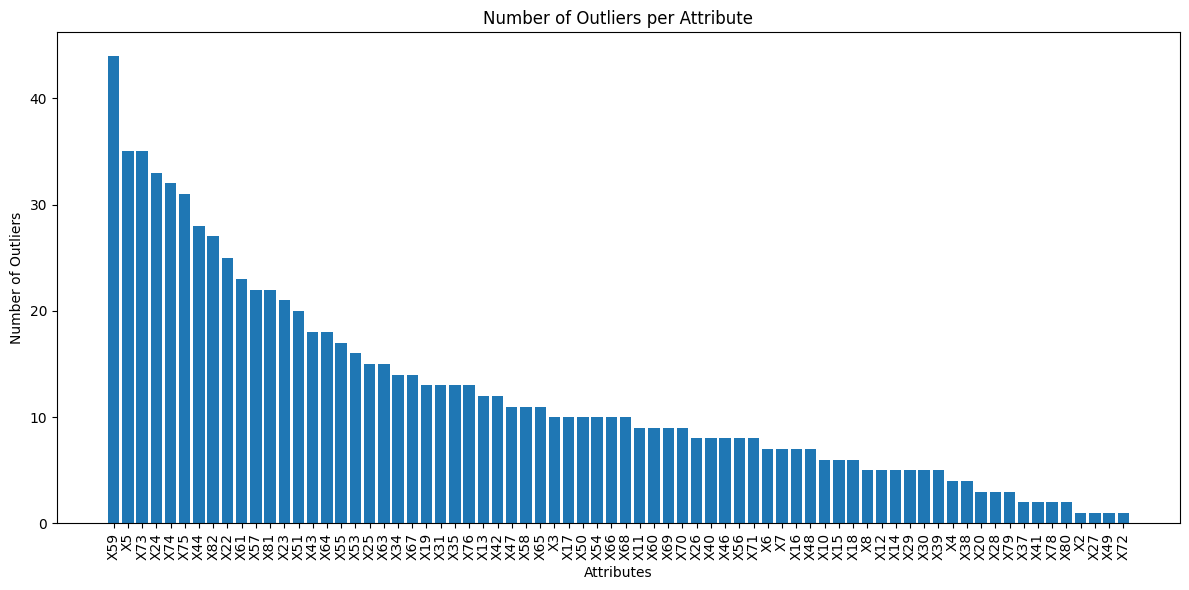

In [58]:
import numpy as np
import pandas as pd

def find_outliers(data):
    outliers = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[column] = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    
    return outliers

# Assuming data2 is your DataFrame
outlier_counts = find_outliers(data2)

# Sort attributes by number of outliers in descending order
sorted_outliers = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)

# Print attributes with outliers
print("Attributes with outliers:")
for attribute, count in sorted_outliers:
    if count > 0:
        print(f"{attribute}: {count} outliers")

# Optionally, you can create a bar plot to visualize the outlier counts
import matplotlib.pyplot as plt

attributes = [attr for attr, count in sorted_outliers if count > 0]
counts = [count for attr, count in sorted_outliers if count > 0]

plt.figure(figsize=(12, 6))
plt.bar(attributes, counts)
plt.title('Number of Outliers per Attribute')
plt.xlabel('Attributes')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [59]:
#check any duplicated data
dups = df_cleaned.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [60]:
correlation_matrix = data2.corr()
correlation_with_X1 = correlation_matrix['X19'].sort_values(ascending=False)

# Display the correlation with X1
correlation_with_X1[0:30]


X19    1.000000
X17    0.946562
X12    0.898571
X35    0.892818
X39    0.843698
X13    0.818914
X11    0.775094
X6     0.725646
X10    0.720220
X18    0.679965
X16    0.631968
X38    0.582645
X14    0.567017
X26    0.439761
X25    0.373642
X68    0.373409
X69    0.315676
X34    0.304103
X72    0.285630
X32    0.278902
X65    0.268103
X70    0.264795
X24    0.260456
X64    0.240673
X4     0.240471
X73    0.214328
X59    0.209781
X37    0.206328
X44    0.201590
X9     0.198208
Name: X19, dtype: float64

In [61]:
# Step 1: Compute the correlation matrix
corr_matrix = data2.corr()

# Step 2: Identify highly correlated features (e.g., correlation > 0.9)
threshold = 0.9
high_corr_pairs = set()

# Loop over the upper triangle of the correlation matrix (excluding the diagonal)
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_pairs.add(colname)

# Step 3: Drop one feature from each highly correlated pair
# Optionally, you can aggregate features instead of removing them. 
# Here, we drop the highly correlated features.
df_reduced = df_cleaned.drop(columns=high_corr_pairs)

# Step 4: Output the results
print("Highly correlated features to drop:", high_corr_pairs)
print("Reduced DataFrame:")
print(df_reduced)

Highly correlated features to drop: {'X39', 'X58', 'X18', 'X17', 'X73', 'X9', 'X35', 'X49', 'X40', 'X75', 'X41', 'X38', 'X30', 'X56', 'X32', 'X10', 'X15', 'X28', 'X19', 'X43', 'X16'}
Reduced DataFrame:
      id    X2    X3    X4    X5    X6    X7    X8   X11   X12  ...      X71  \
1      2  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...     0.00   
4      5  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...     0.00   
5      6  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...     0.00   
8      9  0.62  0.01  1.02 -0.01  0.01  0.61  1.66  0.02  0.06  ...   587.31   
21    22  0.61  0.04  1.17  0.25  0.07  0.64  0.70  0.32  0.19  ...   559.54   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...      ...   
438  439  0.43 -0.11  0.72 -0.29 -0.29  1.24  1.17 -0.75 -0.18  ...  1708.31   
439  440  1.18 -0.67  0.43 -0.66  0.06 -0.15  0.47  0.05  0.17  ...   134.03   
440  441  0.38  0.50  2.34 -0.06 -0.02  1.64  0.18 -0.06 -0.09  ...  2194.33  

In [62]:
print(df_reduced.columns)

Index(['id', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X11', 'X12', 'X13',
       'X14', 'X20', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X29', 'X31',
       'X33', 'X34', 'X37', 'X42', 'X44', 'X46', 'X47', 'X48', 'X50', 'X51',
       'X53', 'X54', 'X55', 'X57', 'X59', 'X60', 'X61', 'X63', 'X64', 'X65',
       'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X74', 'X76', 'X78',
       'X79', 'X80', 'X81', 'X82', 'Profit_Category'],
      dtype='object')


# 3. Classification

### Decision Tree Classifier

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_reduced.drop(['Profit_Category','id'],axis=1),df_reduced['Profit_Category'],test_size=0.30,random_state=1004)

In [64]:
# from sklearn import tree

# Y = df_cleaned['Profit_Category']
# X = df_cleaned.drop(['Num','id','Country', 'S','Profit_Category'],axis=1)

# clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
# clf = clf.fit(X, Y)

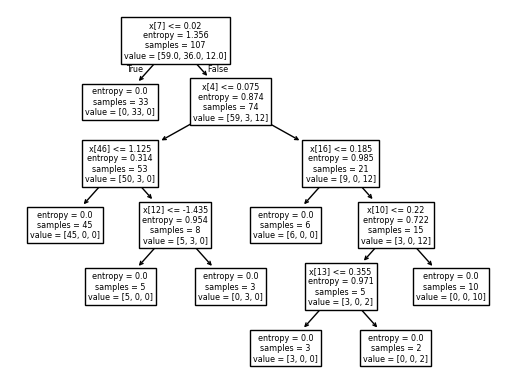

In [65]:
from sklearn import tree

dtree= tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred_labels_dtree = dtree.predict(x_test)

tree.plot_tree(dtree)
plt.show()

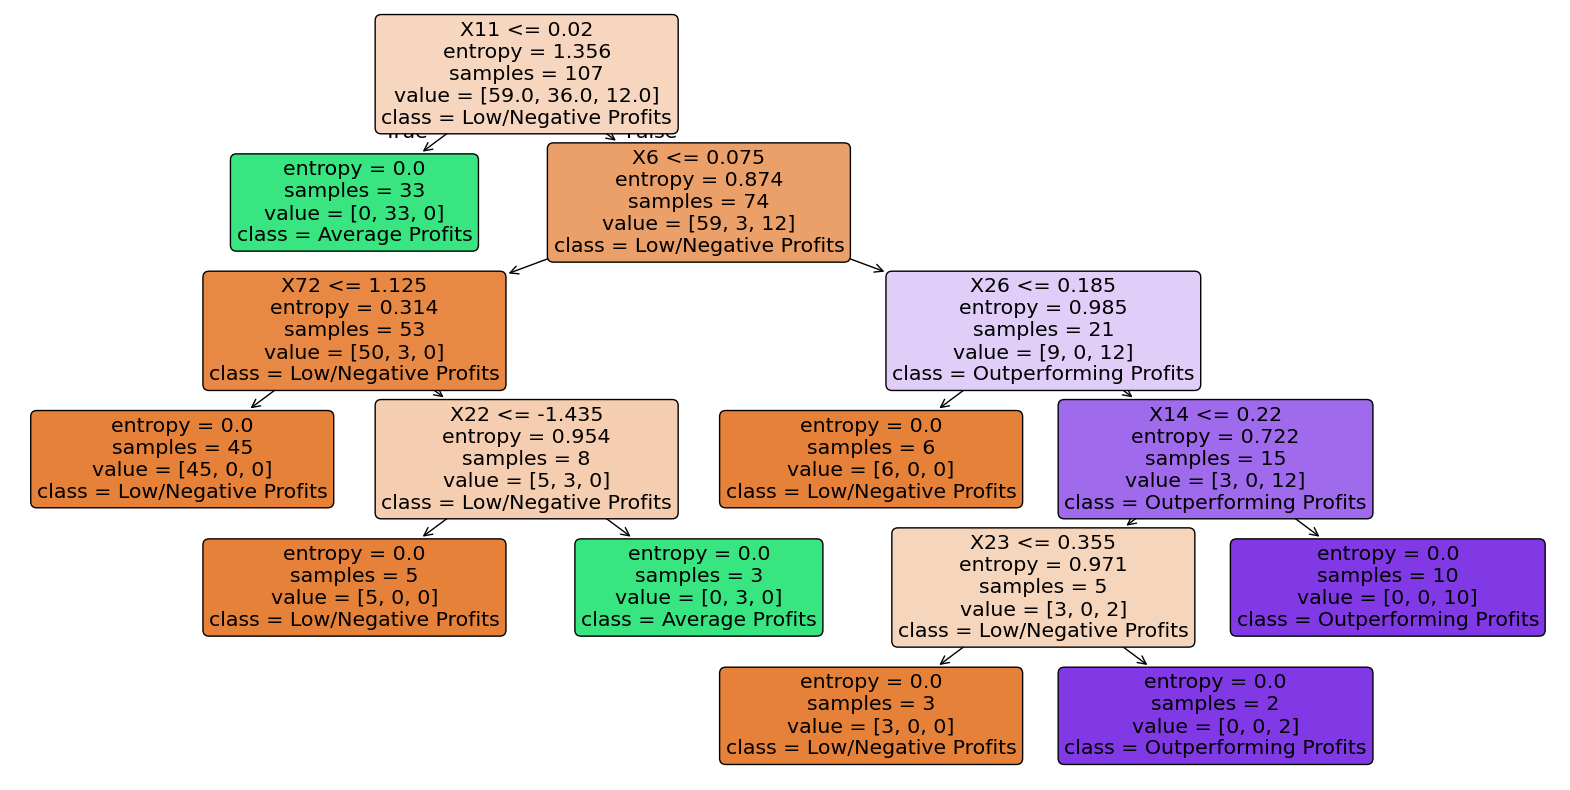

In [66]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Prepare the data features
data_feat = df_reduced.drop(['Profit_Category', 'id'], axis=1)  # Corrected syntax
features = list(data_feat.columns)

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the size of the plot as needed
plot_tree(dtree, 
          feature_names=features, 
          class_names=['Low/Negative Profits', 'Average Profits', 'Outperforming Profits'],  # Replace with actual class names
          filled=True, 
          rounded=True)
plt.show()

Next, suppose we apply the decision tree to classify the following 8 test examples.

In [67]:
import pandas as pd

test_data = {
    "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "X2": [0.00, 0.61, 1.18, 0.43, 0.00, 0.38, 0.50, 0.70, 0.65, 0.75],
    "X3": [0.00, 0.04, -0.67, -0.11, 0.00, 0.50, 0.45, 0.10, 0.20, 0.15],
    "X4": [0.00, 1.17, 0.43, 0.72, 0.00, 2.34, 1.25, 0.50, 0.60, 0.55],
    "X5": [0.00, 0.25, -0.66, -0.29, 0.00, -0.06, -0.10, 0.20, 0.10, 0.15],
    "X6": [0.00, 0.07, 0.06, -0.29, 0.00, -0.02, 0.03, 0.10, 0.12, 0.11],
    "X7": [0.00, 0.64, -0.15, 1.24, 0.00, 1.64, 1.05, 0.80, 0.85, 0.90],
    "X8": [0.00, 0.70, 0.47, 1.17, 0.00, 0.18, 1.10, 1.10, 1.20, 1.30],
    "X11": [0.00, 0.32, 0.05, -0.75, 0.00, -0.06, -0.08, 0.20, 0.18, 0.15],
    "X12": [0.00, 0.19, 0.17, -0.18, 0.00, -0.09, 0.02, 0.15, 0.12, 0.18],
    "X71": [0.00, 559.54, 134.03, 1708.31, 0.00, 2194.33, 950.50, 500.00, 600.00, 650.00],
    "X72": [0.00, 0.91, 1.40, 0.43, 0.00, 0.62, 0.98, 1.20, 1.30, 1.25],
    "X74": [0.00, 1.04, 0.65, 0.46, 0.00, 0.91, 1.05, 1.00, 1.05, 1.10],
    "X76": [0.00, 0.66, -10.91, -0.38, 0.00, -0.83, 0.25, 0.50, 0.60, 0.55],
    "X78": [0.00, 1.03, 0.53, 0.53, 0.00, 1.11, 0.85, 1.00, 1.10, 1.20],
    "X79": [0.00, 0.87, 1.31, 0.29, 0.00, 0.65, 0.90, 0.80, 0.90, 1.00],
    "X80": [0.00, 0.86, 0.66, 0.50, 0.00, 0.86, 1.25, 0.80, 0.85, 0.90],
    "X81": [0.00, 1.56, -0.56, -0.19, 0.00, -0.93, 1.45, 1.50, 1.60, 1.70],
    "X82": [0.00, -0.34, -0.53, 9.61, 0.00, 1.61, 0.90, 1.00, 1.10, 1.20],
    "Profit_Category": [
        "Low/Negative Profits", 
        "Average Profits", 
        "Average Profits", 
        "Low/Negative Profits", 
        "Low/Negative Profits", 
        "Low/Negative Profits", 
        "Average Profits", 
        "Outperforming Profits", 
        "Outperforming Profits", 
        "Outperforming Profits"
    ]
}

# Create the DataFrame
testdata = pd.DataFrame(test_data, columns=df_reduced.columns)
print(testdata)
print(df_reduced.columns)

testY = testdata['Profit_Category']
testX = testdata.drop(['Profit_Category','id'],axis=1)

predY = dtree.predict(testX)
predictions = pd.concat([testdata,pd.Series(predY,name='Predicted Class')], axis=1)
predictions



   id    X2    X3    X4    X5    X6    X7    X8   X11   X12  ...      X71  \
0   1  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...     0.00   
1   2  0.61  0.04  1.17  0.25  0.07  0.64  0.70  0.32  0.19  ...   559.54   
2   3  1.18 -0.67  0.43 -0.66  0.06 -0.15  0.47  0.05  0.17  ...   134.03   
3   4  0.43 -0.11  0.72 -0.29 -0.29  1.24  1.17 -0.75 -0.18  ...  1708.31   
4   5  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...     0.00   
5   6  0.38  0.50  2.34 -0.06 -0.02  1.64  0.18 -0.06 -0.09  ...  2194.33   
6   7  0.50  0.45  1.25 -0.10  0.03  1.05  1.10 -0.08  0.02  ...   950.50   
7   8  0.70  0.10  0.50  0.20  0.10  0.80  1.10  0.20  0.15  ...   500.00   
8   9  0.65  0.20  0.60  0.10  0.12  0.85  1.20  0.18  0.12  ...   600.00   
9  10  0.75  0.15  0.55  0.15  0.11  0.90  1.30  0.15  0.18  ...   650.00   

    X72   X74    X76   X78   X79   X80   X81   X82        Profit_Category  
0  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00   Low/Negative Profits  


,id,X2,X3,X4,X5,X6,X7,X8,X11,X12,...,X72,X74,X76,X78,X79,X80,X81,X82,Profit_Category,Predicted Class
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Low/Negative Profits,Low/Negative Profits
1,2,0.61,0.04,1.17,0.25,0.07,0.64,0.70,0.32,0.19,...,0.91,1.04,0.66,1.03,0.87,0.86,1.56,-0.34,Average Profits,Average Profits
2,3,1.18,-0.67,0.43,-0.66,0.06,-0.15,0.47,0.05,0.17,...,1.40,0.65,-10.91,0.53,1.31,0.66,-0.56,-0.53,Average Profits,Average Profits
3,4,0.43,-0.11,0.72,-0.29,-0.29,1.24,1.17,-0.75,-0.18,...,0.43,0.46,-0.38,0.53,0.29,0.50,-0.19,9.61,Low/Negative Profits,Low/Negative Profits
4,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Low/Negative Profits,Low/Negative Profits
5,6,0.38,0.50,2.34,-0.06,-0.02,1.64,0.18,-0.06,-0.09,...,0.62,0.91,-0.83,1.11,0.65,0.86,-0.93,1.61,Low/Negative Profits,Low/Negative Profits
6,7,0.50,0.45,1.25,-0.10,0.03,1.05,1.10,-0.08,0.02,...,0.98,1.05,0.25,0.85,0.90,1.25,1.45,0.90,Average Profits,Low/Negative Profits
7,8,0.70,0.10,0.50,0.20,0.10,0.80,1.10,0.20,0.15,...,1.20,1.00,0.50,1.00,0.80,0.80,1.50,1.00,Outperforming Profits,Outperforming Profits
8,9,0.65,0.20,0.60,0.10,0.12,0.85,1.20,0.18,0.12,...,1.30,1.05,0.60,1.10,0.90,0.85,1.60,1.10,Outperforming Profits,Outperforming Profits
9,10,0.75,0.15,0.55,0.15,0.11,0.90,1.30,0.15,0.18,...,1.25,1.10,0.55,1.20,1.00,0.90,1.70,1.20,Outperforming Profits,Outperforming Profits


In [68]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.90


## 3.3. Alternative Classification Techniques

Besides decision tree classifier, the Python sklearn library also supports other classification techniques. In this section, we try to use other techniques, using ensemble methods.

An ensemble classifier constructs a set of base classifiers from the training data and performs classification by taking a vote on the predictions made by each base classifier. We consider 2 types of ensemble classifiers in this example: bagging, and random forest.

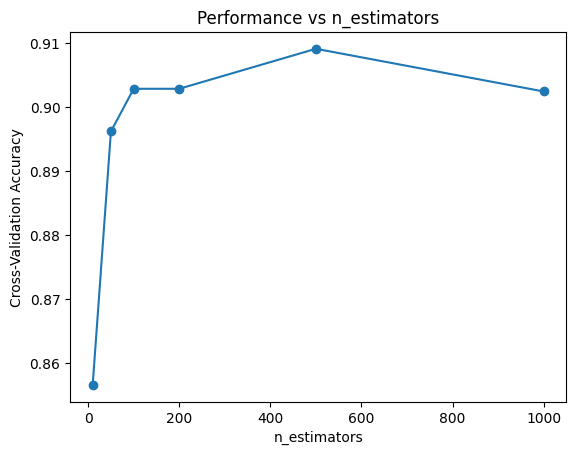

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10)

# Define the range of n_estimators to evaluate
n_estimators_range = [10, 50, 100, 200, 500, 1000]

# Store the cross-validation scores for each n_estimators value
cv_scores = []

# Loop over each value of n_estimators
for n in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    # Perform cross-validation and store the mean accuracy score
    scores = cross_val_score(clf, df_reduced.drop('Profit_Category',axis=1), df_reduced['Profit_Category'], cv=kf)  # 10-fold cross-validation
    cv_scores.append(np.mean(scores))  # Average score across folds

# Plot the results
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.title("Performance vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Cross-Validation Accuracy")
plt.show()



In [70]:
# Find the maximum cross-validation score
max_score = np.max(cv_scores)

# Find the index of the maximum score
max_index = np.argmax(cv_scores)

# Get the corresponding n_estimators value for the maximum score
best_n_estimators = n_estimators_range[max_index]

print("max score: ", max_score,  "best n number:", best_n_estimators)

max score:  0.9091666666666667 best n number: 500


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=500,random_state=42)
clf.fit(x_train, y_train)
y_predTrain = clf.predict(x_train)
y_predTest = clf.predict(x_test)

trainAcc.append(accuracy_score(y_train, y_predTrain))
testAcc.append(accuracy_score(y_test, y_predTest))

kf = KFold(n_splits=10)

clf = RandomForestClassifier()

rt_score = cross_val_score(clf, df_reduced.drop('Profit_Category',axis=1), df_reduced['Profit_Category'], cv=kf)

print("Random Forest:", np.mean(rt_score))

Random Forest: 0.89625


In [72]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

trainAcc.append(accuracy_score(y_train, y_predTrain))
testAcc.append(accuracy_score(y_test, y_predTest))

kf = KFold(n_splits=10)
bag = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(x_train, y_train)
y_predTrain = clf.predict(x_train)
y_predTest = clf.predict(x_test)


bag_score = cross_val_score(bag, df_reduced.drop('Profit_Category',axis=1), df_reduced['Profit_Category'], cv=kf)

print("Bagging Trees:", np.mean(bag_score))

Bagging Trees: 0.9020833333333333


In [73]:
from sklearn.ensemble import BaggingClassifier

ada = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(x_train, y_train)
y_predTrain = clf.predict(x_train)
y_predTest = clf.predict(x_test)

trainAcc.append(accuracy_score(y_train, y_predTrain))
testAcc.append(accuracy_score(y_test, y_predTest))

ada_score = cross_val_score(ada, df_reduced.drop('Profit_Category',axis=1), df_reduced['Profit_Category'], cv=kf)
print("Ada:", np.mean(ada_score))


Decision Trees: 0.8691666666666666


/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

In [78]:

# Mean of all the score arrays
print("Bagging:", np.mean(bag_score), "Random Forest:", np.mean(rt_score), "Ada:", np.mean(ada_score))

Bagging: 0.9020833333333333 Random Forest: 0.9091666666666667 Ada: 0.8691666666666666


In [76]:
#evaluation
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(y_train, y_train_pred, average='micro')
print("precision: ", p)
r = recall_score(y_train, y_train_pred, average='micro')
print("recall: ", r)
f1 = f1_score(y_train, y_train_pred, average='micro')
print("f1 score: ", f1)

NameError: name 'y_train_pred' is not defined

## 3.4 Summary